## Telecom Churn Project
- Build a model to predict whether any given customer will switch to a different service provider or not.
- In telecom terminology, Switch means ‘Churn’ 
- Whether or not a particular customer has churned
- Churn is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.

# Step for Multivariate_ Logistic_Reg
### Step 1: Importing and Merging Data
### Step 2: Inspecting the master dataframe & Understanding of the data
### Step 3: Data Preparation
### Step 4: Test-Train Split
### Step 5: Feature Scaling
### Step 6: Looking at Correlations
### Step 7: Model Building
### Step 8: Feature Selection Using RFE
### Step 9: Plotting the ROC Curve
### Step 10: Finding Optimal Cutoff Point
### Step 11: Making predictions on the test set

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and Numpy
import pandas as pd, numpy as np

In [3]:
# Readings all input file
churn_df = pd.read_csv("churn_file.csv")
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.shape


(7043, 9)

In [5]:
customer_df = pd.read_csv("customer_file.csv")
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
customer_df.shape


(7043, 5)

In [7]:
internet_df = pd.read_csv("internet_file.csv")
internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [8]:
internet_df.shape

(7043, 9)

### Create the master data frame

In [9]:
# Merging on 'customerID'
first_merge = pd.merge(churn_df,customer_df, how='inner', on='customerID')


In [10]:
# Final dataframe with all perdictor variables
telecom_df = pd.merge(first_merge,internet_df, how='inner', on='customerID')


### Step 2: Inspecting the master dataframe & Understanding of the data

- Check structure of the master dataframe

In [11]:
# Browser master dataset
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [12]:
telecom_df.shape

(7043, 21)

In [13]:
telecom_df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [14]:
# check type info of each column variable
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

### Dealing with Categorical variables
#### Converting binary variables (Yes/No) into 0/1

In [15]:
# List of variables to map

varlist =['PhoneService', 'PaperlessBilling','Churn','Partner','Dependents']
# Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No': 0})

# Applying the function to the housing list
telecom_df[varlist] = telecom_df[varlist].apply(binary_map)

In [16]:
# Check the change is implemented or not
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


### Dealing with multiple levels of categorical variables 
#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [17]:
# Creating dummy variables for the categoriacal variables and dropping the FIRST.
dummy1 = pd.get_dummies(telecom_df[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
# Adding the results to the master dataframe
telecom_df =pd.concat([telecom_df, dummy1], axis=1)

In [18]:
# Check the change reflected or not
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [19]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [20]:
telecom_df['MultipleLines'].head(20)

0     No phone service
1                   No
2                   No
3     No phone service
4                   No
5                  Yes
6                  Yes
7     No phone service
8                  Yes
9                   No
10                  No
11                  No
12                 Yes
13                 Yes
14                  No
15                 Yes
16                  No
17                 Yes
18                  No
19                  No
Name: MultipleLines, dtype: object

In [21]:
# Creating dummy variables for hte remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable "Multipleline"
ML1 = pd.get_dummies(telecom_df['MultipleLines'], prefix='MultipleLines')
# Dropping Multiplelines_No phone service column
ML = ML1.drop(['MultipleLines_No phone service'],1)
# Adding the results to the mastter dataframe
telecom_df = pd.concat([telecom_df,ML],axis=1)

In [22]:
#  Dropping the  No phone service 
# and MultipleLines only containe the MultipleLines_No and MultipleLines_yes
ML


,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,1


In [23]:
telecom_df.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,0.265370,0.162147,0.483033,0.299588,0.209144,0.240664,0.216101,0.335794,0.228880,0.504756,0.439585,0.216669,0.481329,0.421837
std,24.559481,0.295752,0.491457,30.090047,0.441561,0.368612,0.499748,0.458110,0.406726,0.427517,0.411613,0.472301,0.420141,0.500013,0.496372,0.412004,0.499687,0.493888
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Creating dummy variables for the variable 'OnlineSecurity'.
OS1 = pd.get_dummies(telecom_df['OnlineSecurity'], prefix='OnlineSecurity')
OS = OS1.drop(['OnlineSecurity_No internet service'],1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,OS], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
OB1 = pd.get_dummies(telecom_df['OnlineBackup'], prefix='OnlineBackup')
OB = OB1.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,OB], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
DP1 = pd.get_dummies(telecom_df['DeviceProtection'], prefix='DeviceProtection')
DP = DP1.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,DP], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
TS1 = pd.get_dummies(telecom_df['TechSupport'], prefix='TechSupport')
TS = TS1.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,TS], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
STV1 =pd.get_dummies(telecom_df['StreamingTV'], prefix='StreamingTV')
STV = STV1.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,STV], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
SM1 = pd.get_dummies(telecom_df['StreamingMovies'], prefix='StreamingMovies')
SM = SM1.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom_df = pd.concat([telecom_df,SM], axis=1)

In [25]:
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


### Drop the original categorical variables

In [26]:
# Drop orginal variables as dummies created for them for the below variables
telecom_df = telecom_df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 
                              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [27]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [28]:
#telecom_df['TotalCharges'] = telecom_df['TotalCharges'].convert_objects(convert_numeric=True)
#telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(float)
telecom_df

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
# The object varaible need to be converted into float
#telecom_df['TotalCharges'] = telecom_df['TotalCharges'].convert_objects(convert_numeric=True)
#telecom_df['TotalCharges'] = telecom_df['TotalCharges'].apply(pd.to_numeric, errors="ignore")
#telecom_df['TotalCharges'] = pd.to_numeric(telecom_df.TotalCharges)

telecom_df['TotalCharges'] = telecom_df['TotalCharges'].apply(pd.to_numeric, errors="coerce")

In [30]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [31]:
telecom_df

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0


Now the df is ready to use for further analysis

#### Finding the Outliers in variables

In [32]:
# Checking for outliers in the continuous variables
telecom_numeric = telecom_df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]


In [33]:
# checking outliers in the continuous variables
telecom_numeric.describe(percentiles =[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for missing values(null values or NaN) and impute them

In [34]:
# Finding the total missing value in every column
telecom_df.isnull().sum()


customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [35]:
# checking the percentage of missing values
# round(number, digits) : number is the value which want to round and digits is after point '.' how much digit you want.

round(100*(telecom_df.isnull().sum()/len(telecom_df.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [36]:
# Removing NaN values of TotalCharges rows
telecom_df = telecom_df[~np.isnan(telecom_df['TotalCharges'])]

In [37]:
# checking percentage of missing values after removing the missing values
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Hurrayy................Now the master dataframe is ready for analysis

### Step4: Text-Train Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Putting feature variable to X
X = telecom_df.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [40]:
# Putting response variable to y
y = telecom_df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [41]:
# Spliting the master dataframe into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

### Step 5: Feature Scalling


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [44]:
#Checking the churn Rate
churn = (sum(telecom_df['Churn'])/len(telecom_df['Churn'].index))*100
churn

26.578498293515356

Rounding we have 27% churn rate

### Step 6: Looking at Correlations

In [45]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

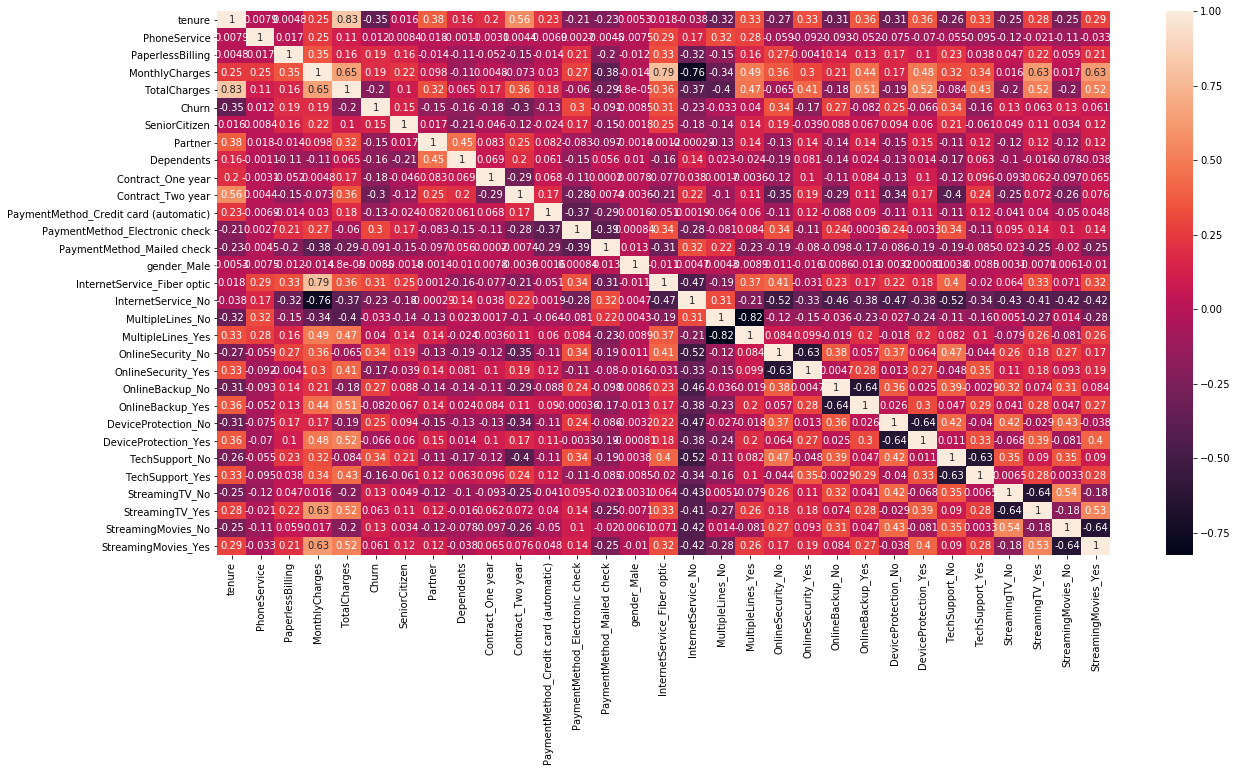

In [46]:
# let's see the correlations matrix
plt.figure(figsize = (20,10))
sns.heatmap(telecom_df.corr(),annot = True)
plt.show()


### Dropping highly correlated dummy variables

In [47]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],)


KeyError: "['MultipleLines_No' 'OnlineSecurity_No' 'OnlineBackup'\n 'DeviceProtection_No' 'TechSupport_No' 'StreamingTV_No'\n 'StreamingMovies_No'] not found in axis"